In [1]:
from IPython.display import display, Image
from pprint import pprint
from itertools import chain

from sympy import Function, Symbol, symbols

from ginv import *
sympy.init_printing()

In [2]:
x1, x2, x3 = sympy.symbols('x1, x2, x3', real=True)
u = sympy.Function('u', real=True)(x1, x2, x3)

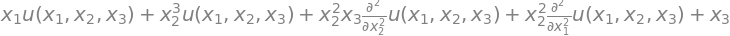

In [3]:
p = (u.diff(x1, 2) + x3*u.diff(x2, 2) + u*x2)*x2**2 + x3 + u*x1
p.expand()

In [4]:
Monom.cmp = Monom.TOPdeglex
# Monom.cmp = Monom.TOPlex

In [5]:
var = ['x1', 'x2', 'x3']
fun = ['u']
Monom.init(var, fun)
df = PolyDiff.df
diff2poly = PolyDiff.diff2poly
var, fun = PolyDiff.init()
x1, x2, x3 = var
u = fun[0]

In [6]:
p = diff2poly(p)
print(p)
print(f"{p}")
print(f"{p!s}")
print(f"{p!r}")
p

df(u, x1, 2)*x2**2 + df(u, x2, 2)*x2**2*x3 + x3 + df(u)*(x1 + x2**3)
df(u, x1, 2)*x2**2 + df(u, x2, 2)*x2**2*x3 + x3 + df(u)*(x1 + x2**3)
df(u, x1, 2)*x2**2 + df(u, x2, 2)*x2**2*x3 + x3 + df(u)*(x1 + x2**3)
[[[0;2 0 0], x2**2], [[0;0 2 0], x2**2*x3], [[0 0 0], x3], [[0;0 0 0], x1 + x2**3]]


[[[0;2 0 0], x2**2],
 [[0;0 2 0], x2**2*x3],
 [[0 0 0], x3],
 [[0;0 0 0], x1 + x2**3]]

prolong 0, Q 2
df(u, x3, 2)
prolong 0, Q 2
df(u, x1, 2)
prolong 2, Q 0
df(u, x1, x3, 2)
prolong 3, Q 0
df(u, x2, 2, x3)
prolong 2, Q 0
df(u, x2, x3, 2)
prolong 3, Q 0
df(u, x1, x2, 2, x3)
prolong 3, Q 0
df(u, x1, x2, x3, 2)
prolong 4, Q 0
df(u, x2, 4)
prolong 3, Q 0
df(u, x2, 3, x3)
prolong 4, Q 0
df(u, x1, x2, 4)
prolong 4, Q 0
df(u, x1, x2, 3, x3)
prolong 5, Q 0
prolong 0, Q 0
crit1: 0
crit2: 0
 time: 0.07 sec
    count: 11
reduction: 29
       HP: 12


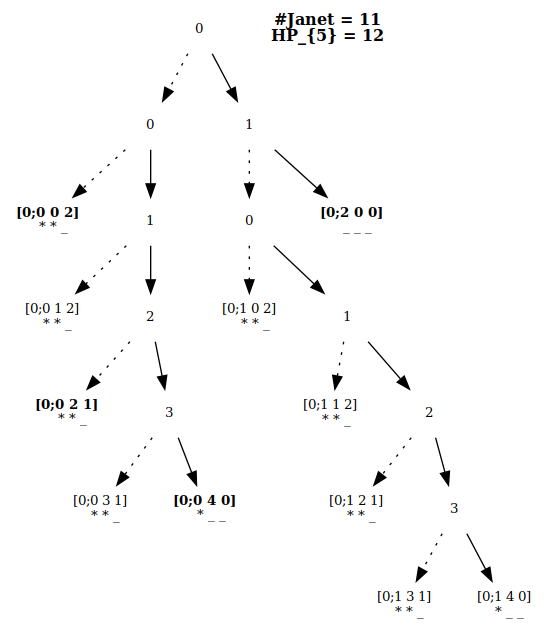

In [7]:
diablo = Janet()
# diablo = JanetCache()
# res = ginvMin((
res = ginvBlockLow((
df(u, x1, 2) + x3*df(u, x2, 2),\
df(u, x3, 2)), \
diablo, level=1)
print(f"crit1: {res[1]}")
print(f"crit2: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {diablo.count()}")
print(f"reduction: {diablo.reduction()}")
print(f"       HP: {diablo.HP()}")
diablo.saveImage('diablo.pdf', level=1)
diablo.saveImage('diablo.png', level=1)
Image('./diablo.png')

In [8]:
for w in diablo:
    print(w.poly)

df(u, x3, 2)
df(u, x2, x3, 2)
df(u, x2, 2, x3)
df(u, x2, 3, x3)
df(u, x2, 4)
df(u, x1, x3, 2)
df(u, x1, x2, x3, 2)
df(u, x1, x2, 2, x3)
df(u, x1, x2, 3, x3)
df(u, x1, x2, 4)
df(u, x1, 2) + df(u, x2, 2)*x3


In [9]:
for w in diablo.GB():
    print(w.poly)

df(u, x3, 2)
df(u, x2, 2, x3)
df(u, x2, 4)
df(u, x1, 2) + df(u, x2, 2)*x3


In [12]:
def gen_series(self, deg=5):
    res = []
    for f in fun:
        r = [0 for v in var]
        for k, v in enumerate(var):
            for i in range(deg):
                if not df(f, v, i).NF(self):
                    r[k] = i
                    break
        l0 = []
        for k, v in enumerate(var):
            l1 = [v**i for i in range(r[k])]
            if not l0:
                l0 = l1
            else:
                l2 = []
                for v0 in l0:
                    for v1 in l1:
                        l2.append(v0*v1)
                l0 = l2
        dv = [v for k, v in enumerate(var) if r[k] == 0]
        for k, v in enumerate(l0):
            l0[k] = Function(f"{f}{k}")(*dv)*v if dv else Symbol(f"{f}{k}")*v
        res.append(sum(l0))
    return res
gen_series(diablo)

In [13]:
rows, i = {}, 0
for d in range(5):
    for m in Monom.gradus(d, pos=0):
        if not diablo.find(m):
            print(f"{m.df()}", end=", ")
            rows[m] = i
            i += 1
    print()
print(f"число произвольных констант в ряде Тейлора: {len(rows)}")

df(u), 
df(u, x1), df(u, x2), df(u, x3), 
df(u, x1, x2), df(u, x1, x3), df(u, x2, 2), df(u, x2, x3), 
df(u, x1, x2, 2), df(u, x1, x2, x3), df(u, x2, 3), 
df(u, x1, x2, 3), 
число произвольных констант в ряде Тейлора: 12


In [14]:
T = 0
for d in range(5):
    for m in Monom.gradus(d, pos=0):
        r = PolyDiff(m)
        r.NFhead(diablo)
        if r or True:
            p = "".join(str(i) for i in m)
            r = sympy.Symbol(f"C_{{{p}}}")
            for i, v in enumerate(m):
                if v:
                    r *= var[i]**v
            T += r
T

In [15]:
eqs = []
for w in diablo.GB():
    eqs.append(eval(str(w.poly).
        replace('df', 'sympy.diff').replace('u', 'T')).expand())
eqs

In [16]:
def to_eqs(a, var):
    for x in var:
        r = []
        for b in a:
            if b:
                r.append([b.coeff(x, i) for i in range(b.as_poly(x).degree()+1) if b.coeff(x, i)])
        a = chain(*r)
    return list(a)

In [17]:
a = to_eqs(eqs, [x1, x2, x3])
a

In [18]:
sol = sympy.solve(a)
sol

In [19]:
T0 = T.subs(sol)
T0

In [20]:
for w in diablo.GB():
    print(eval(str(w.poly).
        replace('df', 'sympy.diff').replace('u', 'T0')).expand())

0
0
0
0
